### Mục tiêu bài toán (problem statement)
Chi phí chăm sóc sức khỏe đang gia tăng trên toàn cầu, với mức phí bảo hiểm y tế cá nhân thường dao động rất lớn do các yếu tố như độ tuổi, chỉ số BMI, tình trạng hút thuốc và nhiều yếu tố khác.
Sự biến động khó lường này gây khó khăn cho các công ty bảo hiểm trong việc đánh giá rủi ro một cách chính xác và thiết lập mức phí phù hợp.

Việc định giá không nhất quán có thể dẫn đến tình trạng thu phí thấp đối với các cá nhân có rủi ro cao, hoặc thu phí quá cao với những người có rủi ro thấp — từ đó ảnh hưởng đến cả lợi nhuận và tính công bằng.

Bằng cách phân tích dữ liệu bảo hiểm trong quá khứ và xây dựng các mô hình dự đoán, chúng ta có thể xác định các yếu tố chính ảnh hưởng đến chi phí và dự báo mức phí một cách chính xác hơn, qua đó thúc đẩy việc định giá dựa trên dữ liệu, tối ưu hóa phân bổ nguồn lực và nâng cao sự hài lòng của khách hàng.


In [35]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Tổng quan dữ liệu

In [36]:
# Khám phá dữ liệu
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [37]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [38]:
df_numerical = df.describe().columns
df_categorical = df.describe(include="object").columns

In [39]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
df.skew(numeric_only=True) # Kiểm tra độ lệch (Skewness) của các biến số

,0
age,0.055673
bmi,0.284047
children,0.938380
charges,1.515880


 Biểu đồ phân bố Histogram cho các biến số số

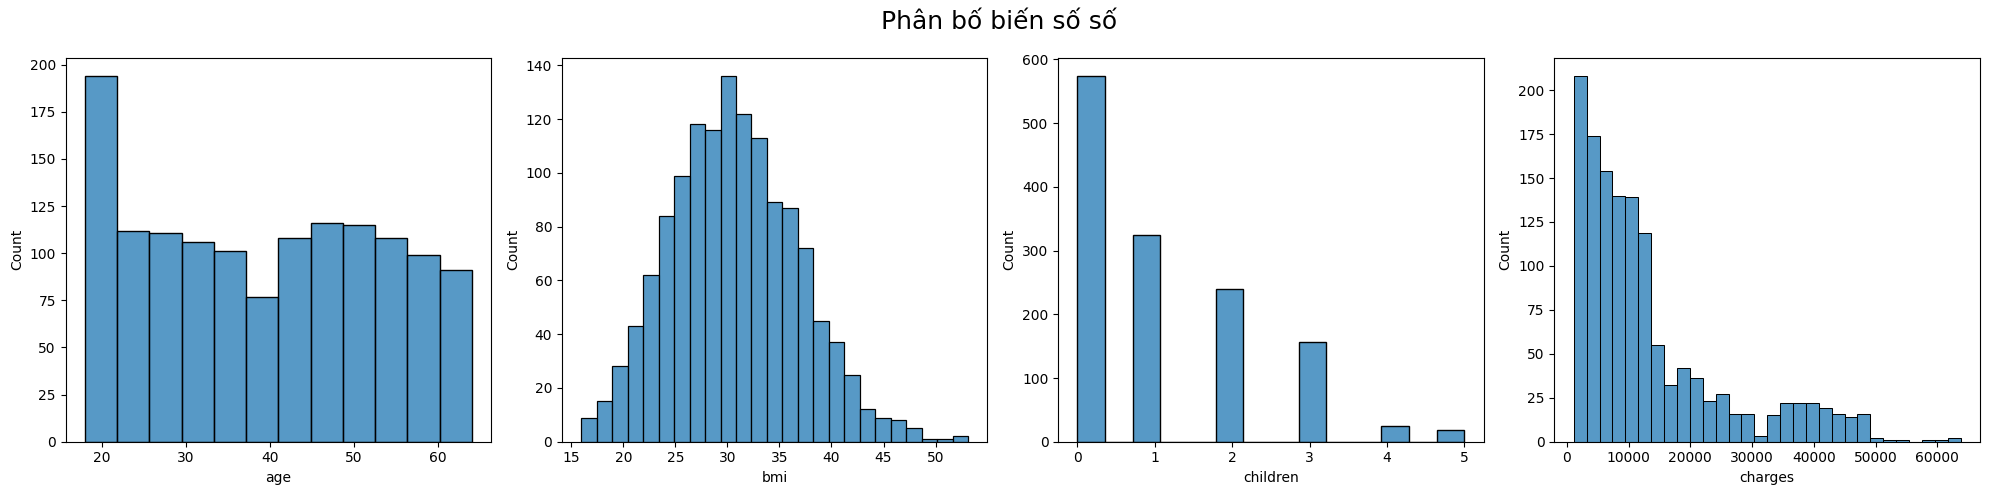

In [49]:
# ✅ Histogram cho biến số số
fig, axs = plt.subplots(ncols=len(df_numerical), figsize=(20, 5))
for i, col in enumerate(df_numerical):
    sns.histplot(df, x=col, ax=axs[i])

plt.suptitle(" Phân bố biến số số", fontsize=18)
plt.tight_layout()
plt.show()


In [50]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [51]:
for i in df_categorical:
    print(f"{df[i].value_counts()}\n")

sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



Biểu đồ phân tích hút thuốc và chi phí

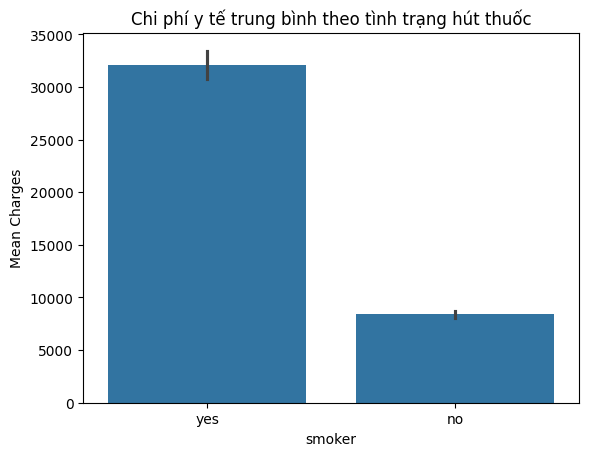

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tạo biểu đồ
ax = sns.barplot(x='smoker', y='charges', data=df, estimator=np.mean)

# Tiêu đề và trục
plt.title('Chi phí y tế trung bình theo tình trạng hút thuốc')
plt.ylabel('Mean Charges')

# Tính trung bình và hiển thị trên đầu cột
means = df.groupby('smoker')['charges'].mean().values




In [42]:
df.dtypes
# kiểu dữ liệu

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


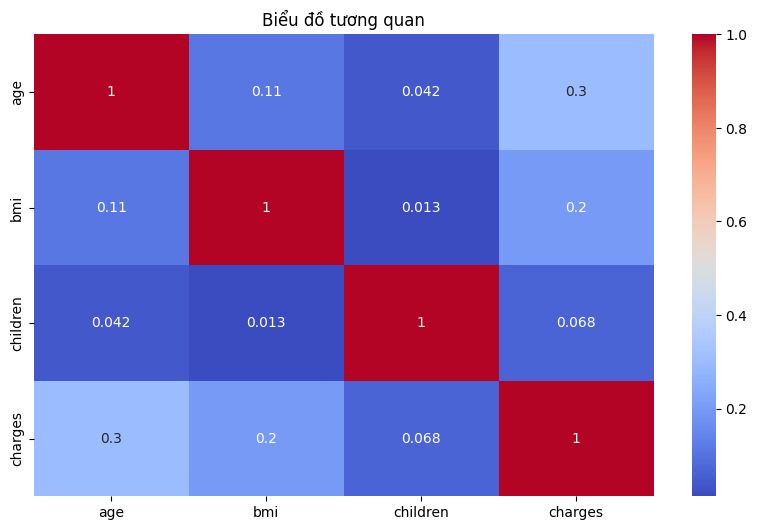

In [68]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Biểu đồ tương quan')
plt.show()


Tiền xử lý dữ liệu (Preprocessing)



In [43]:
from sklearn.preprocessing import LabelEncoder        #  Mã hóa biến phân loại

data = df.copy()
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])           # male 1, femal 0
data['smoker'] = le.fit_transform(data['smoker'])     # yes 1, no 0
data['region'] = le.fit_transform(data['region'])

X = data.drop('charges', axis=1)  # Biến đầu vào
y = data['charges']               # Biến mục tiêu (chi phí)



Chia tập train/test và chuẩn hóa

In [55]:
# Chia tập train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # for regression model

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = scaler.get_feature_names_out())
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = scaler.get_feature_names_out())


In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [57]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,1
1285,47,0,24.320,0,0,0
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,1
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0
860,37,0,47.600,2,1,3


Đánh giá mô hình & Phân tích hệ số


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Tính các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# In kq
print("MAE (Mean Absolute Error):", round(mae, 2))  # Trung bình sai số tuyệt đối

print("RMSE (Root Mean Squared Error):", round(rmse, 2))  # Nhấn mạnh sai số lớn

print("R² Score (Coefficient of Determination):", round(r2, 4)) # Tỷ lệ giải thích được dữ liệu

# Lấy hệ số của từng biến


coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)


MAE (Mean Absolute Error): 4186.51
RMSE (Root Mean Squared Error): 5799.59
R² Score (Coefficient of Determination): 0.7833


,Coefficient
smoker,9557.143383
age,3616.108652
bmi,2028.308579
children,516.662566
sex,-9.392954
region,-302.387980


Kiểm tra skewness (độ lệch)

In [47]:

df['charges'].skew()


np.float64(1.5158796580240388)